In [5]:
import pickle
import numpy as np
import warnings
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
warnings.filterwarnings("ignore")
from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn.preprocessing import label_binarize
import sklearn.metrics as metrics

In [7]:
def ROC_plot(data,name = 'loss_acc_roc/roc-chexpert.svg',save=False):
        classes = data['preds'].shape[1]
        binary_labels = label_binarize(data['labels'],classes=[i for i in range(classes)])
        plt.figure(figsize=(5,4))
        for i in range(classes):
            fpr,tpr,_ = roc_curve(binary_labels[:,i],data['preds'][:,i])
            aucc = auc(fpr,tpr)
            plt.plot(fpr,tpr,label=f'auc{i}:{aucc:.2f}')
        plt.xlabel('fpr')
        plt.ylabel('tpr')
        plt.legend()
        if save:
            plt.savefig(f'roc-{name}.svg',format='svg')
        plt.show()

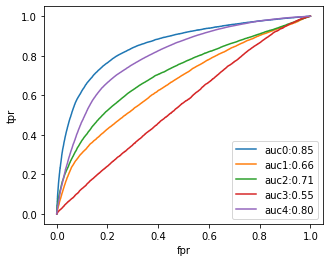

In [8]:
# ExLNet
with open('roc_pickle_files/exlnet.pkl', 'rb') as f:
    x = pickle.load(f)
    ROC_plot(x)

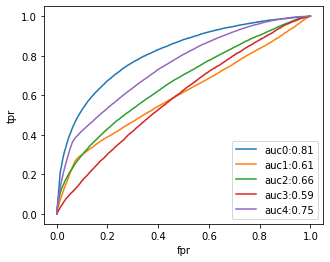

In [9]:
# Efficientnet
with open('roc_pickle_files/efficientnet.pkl', 'rb') as f:
    x = pickle.load(f)
    ROC_plot(x)

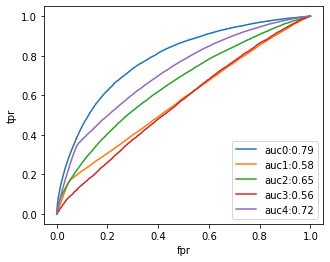

In [10]:
# Mobilenet-V3
with open('roc_pickle_files/mobilenetv3.pkl', 'rb') as f:
    x = pickle.load(f)
    ROC_plot(x)

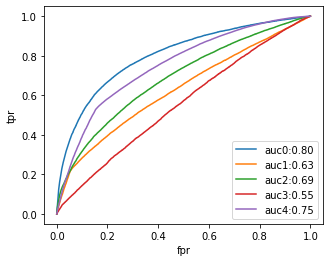

In [11]:
# Shufflenet
with open('roc_pickle_files/shufflenet.pkl', 'rb') as f:
    x = pickle.load(f)
    ROC_plot(x)

dict_keys(['preds', 'labels'])


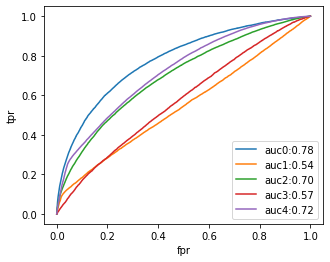

In [12]:
# Mobilenet V2
with open('roc_pickle_files/mobilenetv2.pkl', 'rb') as f:
    x = pickle.load(f)
    print(x.keys())
    ROC_plot(x)

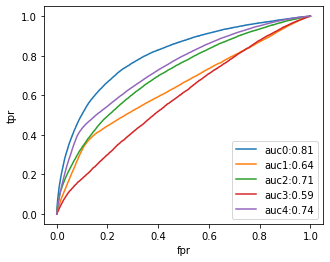

In [13]:
# Squeezenet
with open('roc_pickle_files/squeezenet.pkl', 'rb') as f:
    x = pickle.load(f)
    ROC_plot(x)

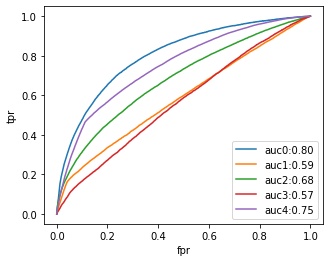

In [14]:
# ResNet
with open('roc_pickle_files/resnet.pkl', 'rb') as f:
    x = pickle.load(f)
    ROC_plot(x)